In [36]:
# 라이브러리 로드
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.graph_objs as go
from plotly.offline import iplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')

In [56]:
# 데이터 로드
data = pd.read_csv("data/2019.csv")

In [57]:
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [101]:
# 행복지수 중앙값
data['Score'].median(axis=0)

5.425

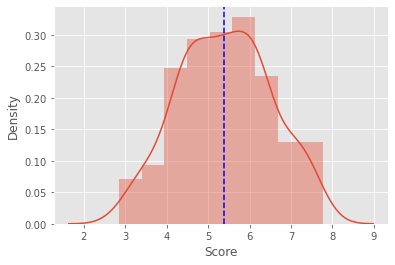

In [60]:
# 행복지수 분포 확인
sns.distplot(data['Score'])
plt.axvline(data['Score'].median(axis=0), color = 'b', linestyle='--')

## 행복지수의 중앙값 : 5.3795

## 한국의 행복지수 : 5.895

### 결론 : 한국은 조금은 행복한 나라인..가?

### 행복지수 지도

In [63]:
dic = dict(type='choropleth', locations = data['Country or region'], locationmode = 'country names', z = data['Overall rank'])
layout = dict(title = 'Global Happiness 2019', geo=dict(showframe = False))
choromap3 = go.Figure(data = [dic], layout = layout)
iplot(choromap3)

### 지역별 행복지수

<AxesSubplot:>

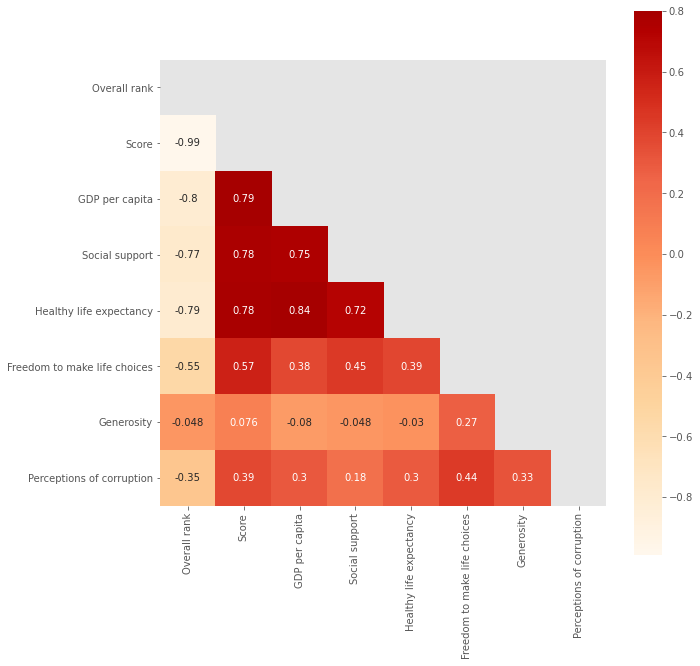

In [65]:
corrmat = data.corr()
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (10, 10))
sns.heatmap(corrmat, annot=True, vmax=.8, square=True, cmap='OrRd', center = 0 , mask = mask)

In [67]:
data_2015 = pd.read_csv("data/2015.csv")
data_2019 = pd.read_csv("data/2019.csv").drop("Overall rank", axis = 1)

data_2015 = data_2015[['Country', 'Region']]
data_2019 = data_2019.rename(columns={"Country or region":'Country'})

data = pd.merge(data_2015, data_2019, on = 'Country')
data.head(5)

,Country,Region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Switzerland,Western Europe,7.480,1.452,1.526,1.052,0.572,0.263,0.343
1,Iceland,Western Europe,7.494,1.380,1.624,1.026,0.591,0.354,0.118
2,Denmark,Western Europe,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,Norway,Western Europe,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,Canada,North America,7.278,1.365,1.505,1.039,0.584,0.285,0.308


<AxesSubplot:title={'center':'Africa'}>

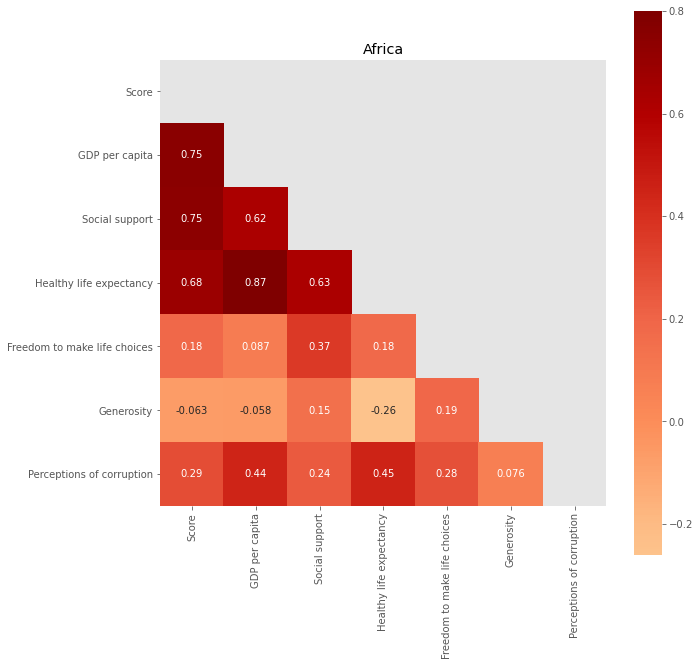

In [77]:
corrmat = data[data['Region'].str.contains('Asia')].corr()
plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.set_title('Africa')
sns.heatmap(corrmat, annot=True, vmax=.8, square=True, cmap="OrRd", center=0, mask=mask)

<AxesSubplot:title={'center':'Europe'}>

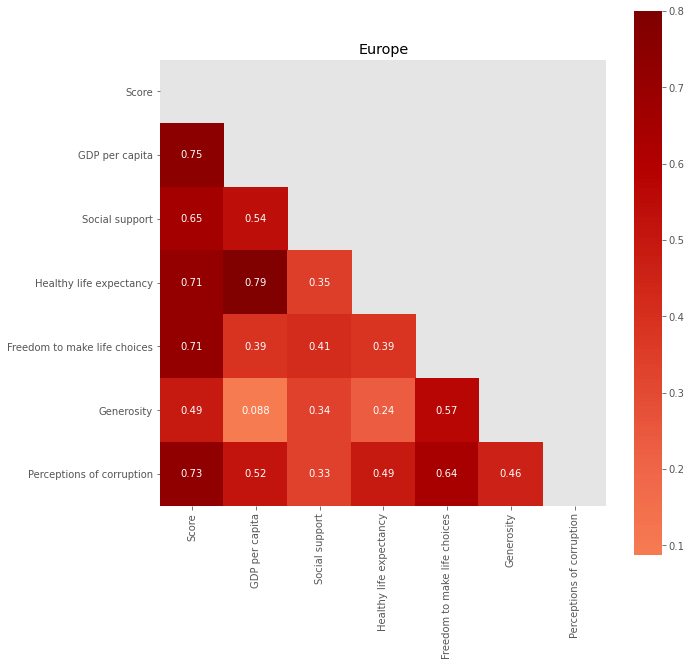

In [78]:
corrmat = data[data['Region'].str.contains('Europe')].corr()
plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.set_title('Europe')
sns.heatmap(corrmat, annot=True, vmax=.8, square=True, cmap="OrRd", center=0, mask=mask)

<AxesSubplot:title={'center':'America'}>

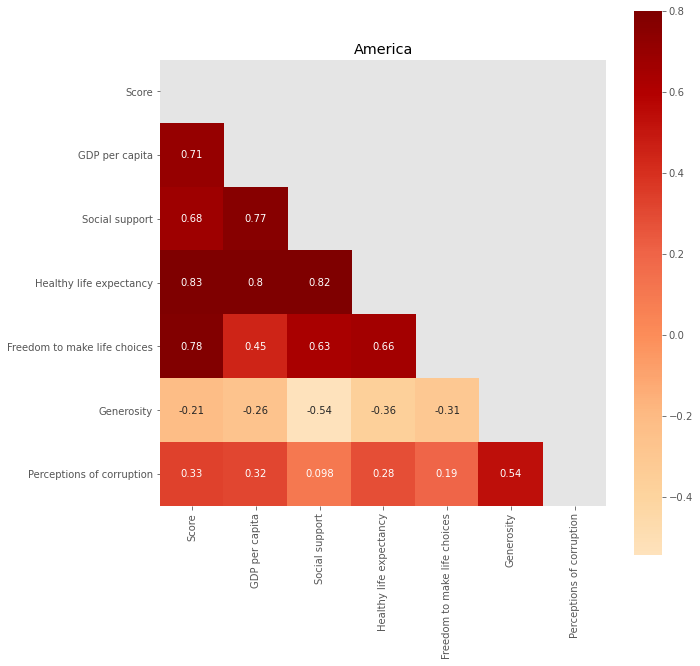

In [79]:
corrmat = data[data['Region'].str.contains('America')].corr()
plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.set_title('America')
sns.heatmap(corrmat, annot=True, vmax=.8, square=True, cmap="OrRd", center=0, mask=mask)

<AxesSubplot:title={'center':'Africa'}>

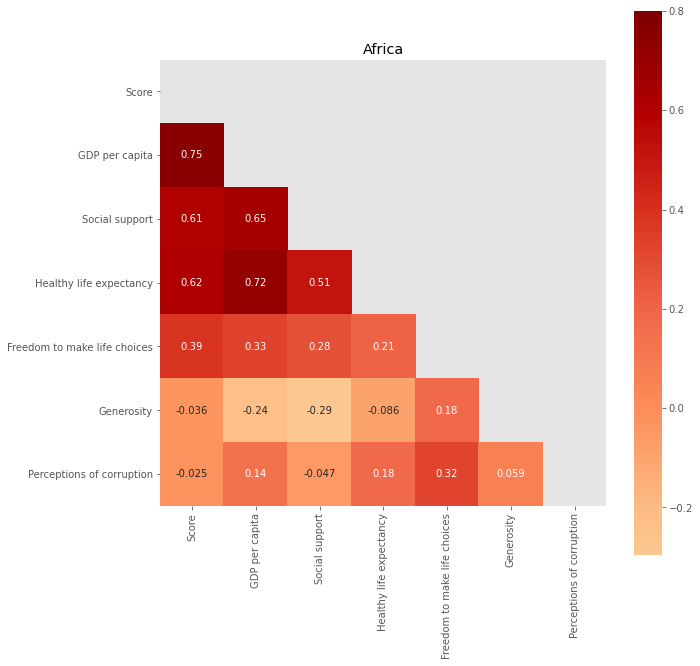

In [80]:
corrmat = data[data['Region'].str.contains('Africa')].corr()
plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.set_title('Africa')
sns.heatmap(corrmat, annot=True, vmax=.8, square=True, cmap="OrRd", center=0, mask=mask)

### 한, 중, 일 비교

In [86]:
kcj_data = data[data['Country'].str.contains('Korea|China|Japan')]
kcj_data = kcj_data.sort_values(by='Score', ascending=False)

In [88]:
kcj_data

,Country,Region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
43,South Korea,Eastern Asia,5.895,1.301,1.219,1.036,0.159,0.175,0.056
42,Japan,Eastern Asia,5.886,1.327,1.419,1.088,0.445,0.069,0.140
79,China,Eastern Asia,5.191,1.029,1.125,0.893,0.521,0.058,0.100


<AxesSubplot:xlabel='Country', ylabel='Score'>

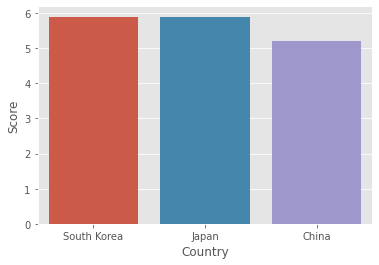

In [87]:
sns.barplot(x='Country', y = 'Score', data = kcj_data)

### 행복지수 예측은 가능할까!?

In [91]:
y = data['Score']
X = data.drop(['Country', 'Region', 'Score'], axis = 1)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                   shuffle=True, random_state = 121)

model = LinearRegression()
model.fit(X_train, y_train)
print("Coefficients: \n", model.coef_)

Coefficients: 
 [0.65462472 1.31603642 1.1191141  1.2147745  0.58242216 0.72639639]


In [97]:
predictions = model.predict(X_test)

Text(0, 0.5, 'Predicted value')

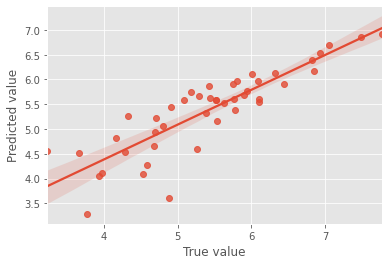

In [100]:
sns.regplot(y_test, predictions, fit_reg=True)
plt.xlabel("True value")
plt.ylabel("Predicted value")